In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

directorio='/home/fcarrasco/Doctorado/WRF.Chem/AndreaColaboracion/ncl_scripts'
fname='rosa_contaminacion_caso4_7_1998.csv'
u=fname.split('_')
u1=u[-1].split('.')
mes=u[-2]
agno=u1[-2]
date=datetime.datetime(int(agno),int(mes),1)
print(date)
print(agno)
data = pd.read_csv(directorio+'/'+fname, header=0, sep=',', dtype=float)
print(data)
angles   = data[data.columns[1]]
co_acc  = data[data.columns[2]]
spd_acc   = data[data.columns[3]]
nsample  = data[data.columns[4]]

co_conc = co_acc/nsample
wspeed  = spd_acc/nsample
print(co_conc)



1998-07-01 00:00:00
1998
    N. Clasif  Degree  Acc CO [ppm]  Acc Wspeed [m/s]  N. Sample
0         1.0     0.0       159.543           209.722      271.0
1         2.0    22.5         8.239            67.222       30.0
2         3.0    45.0        28.504           185.000       98.0
3         4.0    67.5         4.759            25.833       11.0
4         5.0    90.0        16.480            69.722       34.0
5         6.0   112.5         2.267            20.556        9.0
6         7.0   135.0        17.099            83.333       44.0
7         8.0   157.5         4.347            35.000       20.0
8         9.0   180.0        28.025            72.500       44.0
9        10.0   202.5         1.191             6.389        5.0
10       11.0   225.0         9.951            82.222       47.0
11       12.0   247.5        16.003            41.111       22.0
12       13.0   270.0        12.272            77.500       46.0
13       14.0   292.5         0.381             6.389        4.0


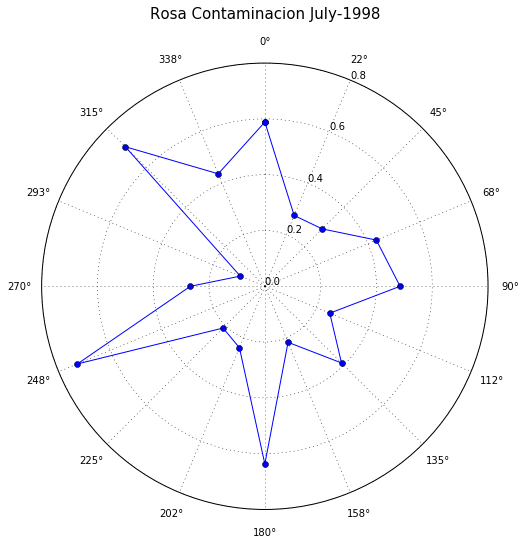

In [95]:
# switch degrees to radians for plotting options
titulo_fig="Rosa Contaminacion "+date.strftime("%B-%Y")
fig = plt.figure("pyplot_windrose_lineplot",figsize=(8,8)) # Create a new figure
ax = plt.axes(polar="true") # Create a polar axis
plt.text(0.5,1.1,titulo_fig,horizontalalignment='center',fontsize=15,transform = ax.transAxes)
p = plt.plot(np.radians(angles),co_conc,linestyle="-",marker="o")


dtheta = 22.5
#print(np.linspace(0,360-dtheta,8))
ax.set_thetagrids(np.linspace(0,360-dtheta,16))
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
ax.set_yticks(np.linspace(0,0.8,5))
fig.canvas.draw()
figname="rosa_contaminacion_"+date.strftime("%B_%Y")
plt.savefig(figname)
